# Understanding pytorch geometric

In [97]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Creating dataframe for references of numbers and indices AND the static graph

In this section we will create on one hand a small dataframe containing only the stations that exist in all time range of the data, their coordinates, their number and a numerical index. This index will be used in posterior steps to order the data. Also, we will filter the data to get only the data refering to the stations that exist in the whole time span of the data.

In [2]:
# creating static graph (only stations that exist in all time range)
data = pd.read_csv("../../data/storage/intermediate/bicimad_dataframe.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0_x',
       'activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'no_available', 'address', 'dock_bikes',
       'id_station', 'time', 'day', 'month', 'year', 'hour', 'weekday',
       'plugs_count', 'unplugs_count', 'latitude', 'longitude', '81', '82',
       '83', '86', '87', '88', '89', 'Unnamed: 0_y', 'dia_semana',
       'work_day_indicator', 'covid_indicator'],
      dtype='object')

In [6]:
numbers_2019 = data[(data["year"]==2019)&(data["month"]==1)]["number"].unique()
numbers_2020 = data[(data["year"]==2020)&(data["month"]==1)]["number"].unique()
numbers_2021 = data[(data["year"]==2021)&(data["month"]==1)]["number"].unique()
numbers_2022 = data[(data["year"]==2022)&(data["month"]==1)]["number"].unique()

numbers_in_all_years = set(numbers_2019).intersection(numbers_2020, numbers_2021, numbers_2022)

# Convert the set back to a list (if needed)
numbers_in_all_years = list(numbers_in_all_years)

In [8]:
len(data["number"].unique())

266

In [9]:
len(numbers_in_all_years)

170

In [10]:
data_static_graph = data[data["number"].isin(numbers_in_all_years)].reset_index(drop=True)
columns_to_delete = [column for column in data_static_graph if "Unnamed" in column]
data_static_graph = data_static_graph.drop(columns_to_delete, axis = 1)
data_static_graph

,activate,name,reservations_count,light,total_bases,free_bases,number,no_available,address,dock_bikes,...,81,82,83,86,87,88,89,dia_semana,work_day_indicator,covid_indicator
0,1.0,Puerta del Sol A,0.0,2.0,30.0,16.0,1a,0.0,Puerta del Sol nº 1,13.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
1,1.0,Puerta del Sol B,0.0,2.0,30.0,11.0,1b,0.0,Puerta del Sol nº 1,14.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
2,1.0,Miguel Moya,0.0,1.0,24.0,2.0,2,0.0,Calle Miguel Moya nº 1,19.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
3,1.0,Plaza Conde Suchil,0.0,0.0,18.0,13.0,3,0.0,Plaza del Conde del Valle de Súchil nº 3,5.0,...,1.30,12.0,11.4,48.0,962.0,1.0,0.0,domingo,1,0
4,1.0,Malasaña,0.0,2.0,24.0,13.0,4,0.0,Calle Manuela Malasaña nº 5,11.0,...,1.30,12.0,11.4,48.0,962.0,1.0,0.0,domingo,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961045,1.0,Paseo de la Esperanza,0.0,2.0,21.0,7.0,163,0.0,Paseo de la Esperanza nº 2,13.0,...,0.53,54.0,23.8,24.0,945.0,1.0,0.0,lunes,1,0
5961046,1.0,Paseo de las Delicias,0.0,1.0,24.0,6.0,164,0.0,Paseo de las Delicias nº 92-94,18.0,...,0.53,54.0,23.2,34.0,945.0,0.0,0.0,lunes,1,0
5961047,1.0,Entrada Matadero,1.0,2.0,27.0,16.0,165,0.0,Paseo de la Chopera nº 14,8.0,...,0.53,54.0,23.2,34.0,945.0,0.0,0.0,lunes,1,0
5961048,1.0,Segovia 26,0.0,1.0,24.0,6.0,166,0.0,"Calle Segovia, 26",17.0,...,0.53,54.0,23.8,24.0,945.0,1.0,0.0,lunes,1,0


In [11]:
data_static_graph.to_csv("bicimad_dataframe_static_graph.csv", index = False)

In [13]:
#we want to get a small dataframe containing only number of the station, an index, latitude and longitude
numbers_with_coordinates = data.groupby("number").first().reset_index()[["number","latitude","longitude"]]
numbers_with_coordinates = numbers_with_coordinates[numbers_with_coordinates["number"].isin(numbers_in_all_years)].reset_index()
numbers_with_coordinates["index"] = np.arange(0,len(numbers_with_coordinates))
numbers_with_coordinates

,index,number,latitude,longitude
0,0,10,40.425388,-3.690129
1,1,100,40.424780,-3.673840
2,2,101,40.423153,-3.669152
3,3,102,40.421180,-3.684023
4,4,103,40.430370,-3.686530
...,...,...,...,...
165,165,95,40.422658,-3.687055
166,166,96,40.422064,-3.682179
167,167,97,40.415709,-3.687793
168,168,98,40.415709,-3.687793


In [14]:
numbers_with_coordinates.to_csv("numbers_with_coordinates_and_indices.csv", index = False)

# Observing Adjacency matrix

This matrix expresses the relations between the nodes. Which node is connected with wich node and with which "intensity". This intensity can be measured with some features such as distance between nodes, inverse of distance, time to go from A to B...

### Moving by bike

In [ ]:
A = pd.read_csv("meters_distance_matrix_bike.csv")
A

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,0,1444,2011,1178,767,124,1891,284,299,686,...,602,1147,439,100,1735,869,1326,1563,1563,2308
1,1396,0,566,1247,1776,1464,2833,1225,1240,1627,...,843,762,1187,1336,2677,1436,855,2169,2169,398
2,2192,797,0,1536,2774,2261,3027,2022,2037,2162,...,1639,1761,1983,2133,3505,1952,1415,2501,2501,1295
3,1017,1367,1933,0,1330,1086,1501,846,862,626,...,524,1069,808,958,1978,417,936,1172,1172,1511
4,804,1727,2293,1412,0,829,2241,633,649,1036,...,1008,1114,919,716,2085,1164,1546,1913,1913,1541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,616,1382,1948,802,928,684,1457,445,460,252,...,539,1084,407,557,1301,0,955,1129,1129,1526
209,1384,784,1144,182,1643,1399,1673,1160,1175,924,...,706,1005,1121,1271,2151,715,0,1345,1345,862
210,1489,2032,2392,1410,2256,1613,1714,1728,1743,784,...,1406,1906,1689,1589,2192,1298,1137,0,0,2110
211,1489,2032,2392,1410,2256,1613,1714,1728,1743,784,...,1406,1906,1689,1589,2192,1298,1137,0,0,2110


Something very interesting to observe, is that the distance is not the same for going from station A to station B, as going from station B to station A. This is due that if you go by bicicle and you need to get in the road, you can not go in any direction, so you need to follow the traffic flow. This forces the user to take different routes to go from A to B or from B to A. When computing the GNN this is a problem, because we want to create a network where every station is a node, and the edges are the connections between nodes. Technically I think it is not possible to put a directional feature in the edges such that distance in one way is one and in the other one is another. For this reason, we will move to walking instead of biking, where the distances should be the same for going from A to B and from B to A while still expressing the geospatial information.

In [16]:
A = pd.read_csv("time_distance_matrix_bike.csv")
A

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,0,468,544,289,211,23,460,83,86,151,...,184,351,166,20,450,198,357,319,319,563
1,383,0,76,301,409,361,677,300,302,367,...,225,201,315,339,666,345,269,415,415,208
2,568,185,0,348,636,546,732,484,487,514,...,410,428,500,524,820,454,406,489,489,342
3,249,389,465,0,291,227,406,165,168,166,...,105,272,181,205,495,106,228,265,265,439
4,175,412,489,272,0,143,494,117,119,184,...,195,302,164,125,483,193,325,353,353,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,153,415,491,185,194,131,408,69,72,98,...,131,298,84,109,390,0,255,267,267,465
209,316,215,247,26,345,282,397,221,223,212,...,132,291,235,260,485,151,0,256,256,319
210,394,491,523,358,605,417,481,359,362,303,...,299,447,374,414,570,300,304,0,0,595
211,394,491,523,358,605,417,481,359,362,303,...,299,447,374,414,570,300,304,0,0,595


### Moving by walking

Now time and distance between A and B and B and A are the same, which will allow us to build a valid adjacency matrix for computing the GNN.

In [2]:
A = pd.read_csv("data_bicimad/meters_distance_matrix_walking.csv")
A

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0,1378,1922,953,767,124,1466,216,231,562,...,535,1070,402,74,1202,543,1048,1346,1346,1456
1,1378,0,561,978,1656,1450,2594,1220,1235,1432,...,843,551,1186,1321,2493,1222,784,2026,2026,190
2,1922,534,0,1338,2201,1995,2954,1743,1727,1792,...,1388,1098,1731,1867,2853,1582,1144,2386,2386,735
3,953,978,1338,0,1300,1071,1616,794,779,475,...,524,833,808,943,1688,417,188,993,993,1056
4,767,1654,2200,1300,0,643,2233,633,649,1036,...,836,1105,522,730,1757,928,1395,1820,1820,1467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,543,1222,1582,417,928,670,1577,384,369,251,...,539,1076,407,541,1313,0,512,940,940,1300
166,1048,784,1144,188,1395,1169,1805,888,873,663,...,562,639,906,1041,1783,512,0,1181,1181,862
167,1346,2026,2386,993,1820,1484,1489,1186,1171,784,...,1417,1826,1346,1353,1823,940,1181,0,0,2049
168,1346,2026,2386,993,1820,1484,1489,1186,1171,784,...,1417,1826,1346,1353,1823,940,1181,0,0,2049


In [18]:
D = pd.read_csv("time_distance_matrix_walking.csv")
D

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0,1133,1510,760,620,99,1107,175,186,435,...,440,881,330,61,932,428,840,1017,1017,1192
1,1015,0,393,738,1252,1073,1949,897,908,1052,...,631,418,893,978,1883,911,603,1471,1471,163
2,1429,418,0,1017,1665,1488,2227,1301,1290,1331,...,1044,834,1306,1393,2161,1190,882,1749,1749,581
3,686,780,1020,0,969,771,1211,561,550,328,...,372,641,590,676,1266,297,145,720,720,840
4,549,1288,1664,961,0,453,1654,455,466,751,...,613,847,368,507,1344,659,1040,1336,1336,1146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,394,993,1233,337,705,486,1175,269,258,175,...,416,851,305,391,1000,0,415,693,693,1052
166,753,631,871,131,1034,840,1342,628,617,459,...,395,493,657,745,1333,362,0,852,852,691
167,1010,1578,1818,787,1409,1113,1155,887,876,591,...,1086,1428,1024,1017,1418,719,931,0,0,1626
168,1010,1578,1818,787,1409,1113,1155,887,876,591,...,1086,1428,1024,1017,1418,719,931,0,0,1626


In [19]:
np.save("meters_distance_matrix_walking.npy",np.array(A))
np.save("time_distance_matrix_walking.npy",np.array(D))

# Preprocessing

Now we need to prepare the data for the GNN. This data will need to contain the following:
- edges: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
- edge_weights: Edge feature matrix with shape [num_edges, num_edge_features]. For us it will be [num_edges, 1], we will only use the distance or time.
- features: Node feature matrix with shape [data points (num_nodes*quantity of time periods registered), num_node_features]
- targets: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

### Ordering data

IMPORTANT!! Features will be ordered first by time (year,month,day,hour) but then stations need to be ordered in the same way as the nodes. Node with index 0 which represents station with index 0, will be related to the first row in the data. The data will be inputed as a pytorch tensor, so we need to make sure it is ordered previously. So the data will need to be ordered by year, month, day, hour AND station index, which is a variable that has veen created in "numbers_with_coordinates_and_indices.csv"

In [71]:
numbers_code_coordinates = pd.read_csv(os.path.join("data_bicimad","numbers_with_coordinates_and_indices.csv"))
numbers_code_coordinates.head()

,index,number,latitude,longitude
0,0,10,40.425388,-3.690129
1,1,100,40.424780,-3.673840
2,2,101,40.423153,-3.669152
3,3,102,40.421180,-3.684023
4,4,103,40.430370,-3.686530


In [72]:
data_static_graph = pd.read_csv(os.path.join("data_bicimad","bicimad_dataframe_static_graph.csv"))
data_static_graph.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,no_available,address,dock_bikes,...,81,82,83,86,87,88,89,dia_semana,work_day_indicator,covid_indicator
0,1.0,Puerta del Sol A,0.0,2.0,30.0,16.0,1a,0.0,Puerta del Sol nº 1,13.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
1,1.0,Puerta del Sol B,0.0,2.0,30.0,11.0,1b,0.0,Puerta del Sol nº 1,14.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
2,1.0,Miguel Moya,0.0,1.0,24.0,2.0,2,0.0,Calle Miguel Moya nº 1,19.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
3,1.0,Plaza Conde Suchil,0.0,0.0,18.0,13.0,3,0.0,Plaza del Conde del Valle de Súchil nº 3,5.0,...,1.30,12.0,11.4,48.0,962.0,1.0,0.0,domingo,1,0
4,1.0,Malasaña,0.0,2.0,24.0,13.0,4,0.0,Calle Manuela Malasaña nº 5,11.0,...,1.30,12.0,11.4,48.0,962.0,1.0,0.0,domingo,1,0


In [73]:
data_static_graph_index = data_static_graph.merge(numbers_code_coordinates[["number", "index"]], on="number", how = "left").reset_index()

In [74]:
#ordering data
data_static_graph_index = data_static_graph_index.sort_values(by = ["year","month","day","hour","index"], ascending=[True,True,True,True,True], ignore_index=True)
data_static_graph_index = data_static_graph_index.drop("level_0",axis = 1)
data_static_graph_index[["year","month","day","hour","index","weekday"]]

,year,month,day,hour,index,weekday
0,2019,1,1,0.0,0,1
1,2019,1,1,0.0,1,1
2,2019,1,1,0.0,2,1
3,2019,1,1,0.0,3,1
4,2019,1,1,0.0,4,1
...,...,...,...,...,...,...
5961045,2022,12,31,23.0,165,5
5961046,2022,12,31,23.0,166,5
5961047,2022,12,31,23.0,167,5
5961048,2022,12,31,23.0,168,5


### Feature engineering

There is a lot of feature engieering to be done here like making cyclic month, day, hour, wind direction, day of the week... for the moment we wont process anything, we will only try to have an implementation.

#### Lagged variables

Now, we will create the lagged variables for plugs and unplugs of last week, so that for week 2, at monday at 10 am, the model will have the information of plugs and unplugs at monday at 10 am of the previous week for each station. As the data will be ordered in the following order (year, month, day, hour, station), creating the lagged variable will be as simple as shifting the target for 7*24*170 = 28560 rows.

In [75]:
data_static_graph_index[["year","month","day","hour","index","weekday","unplugs_count"]][0:]

,year,month,day,hour,index,weekday,unplugs_count
0,2019,1,1,0.0,0,1,0.0
1,2019,1,1,0.0,1,1,1.0
2,2019,1,1,0.0,2,1,2.0
3,2019,1,1,0.0,3,1,1.0
4,2019,1,1,0.0,4,1,1.0
...,...,...,...,...,...,...,...
5961045,2022,12,31,23.0,165,5,0.0
5961046,2022,12,31,23.0,166,5,0.0
5961047,2022,12,31,23.0,167,5,0.0
5961048,2022,12,31,23.0,168,5,0.0


In [76]:
data_static_graph_index.shift(28560)[["year","month","day","hour","index","weekday","unplugs_count"]][28560:]

,year,month,day,hour,index,weekday,unplugs_count
28560,2019.0,1.0,1.0,0.0,0.0,1.0,0.0
28561,2019.0,1.0,1.0,0.0,1.0,1.0,1.0
28562,2019.0,1.0,1.0,0.0,2.0,1.0,2.0
28563,2019.0,1.0,1.0,0.0,3.0,1.0,1.0
28564,2019.0,1.0,1.0,0.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...
5961045,2022.0,12.0,24.0,23.0,165.0,5.0,0.0
5961046,2022.0,12.0,24.0,23.0,166.0,5.0,0.0
5961047,2022.0,12.0,24.0,23.0,167.0,5.0,0.0
5961048,2022.0,12.0,24.0,23.0,168.0,5.0,0.0


In [77]:
# this lagged variables will have NaN values for the first, week. We will loose this data
data_static_graph_index["plugs_count_lagged"] = data_static_graph_index.shift(28560)["plugs_count"]
data_static_graph_index["unplugs_count_lagged"] = data_static_graph_index.shift(28560)["unplugs_count"]

In [78]:
data_static_graph_index["unplugs_count_lagged"].isna().sum()

28560

In [79]:
# we delete that week
data_static_graph_index=data_static_graph_index[~data_static_graph_index["plugs_count_lagged"].isna()].reset_index()
data_static_graph_index = data_static_graph_index.drop("level_0",axis =1) 

#### Cyclic variables

The cyclic features will be ['month','day','hour',"weekday"], and also wind speed in x and y coordinates. At this time, wind is explained with 2 variables, wind speed and wind direction (in degrees).

In [81]:
data_static_graph_index.columns

Index(['activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'no_available', 'address', 'dock_bikes',
       'id_station', 'time', 'day', 'month', 'year', 'hour', 'weekday',
       'plugs_count', 'unplugs_count', 'latitude', 'longitude', '81', '82',
       '83', '86', '87', '88', '89', 'dia_semana', 'work_day_indicator',
       'covid_indicator', 'index', 'plugs_count_lagged',
       'unplugs_count_lagged'],
      dtype='object')

In [82]:
from feature_engine.creation import CyclicalFeatures

cyclical_features = ['month','day','hour',"weekday"]
cf = CyclicalFeatures()
cf.fit(data_static_graph_index[cyclical_features])

data_static_graph_index = pd.concat([data_static_graph_index, cf.transform(data_static_graph_index[cyclical_features]).drop(cyclical_features, axis=1)], axis=1).drop(cyclical_features, axis=1)

In [83]:
data_static_graph_index[[column for column in data_static_graph_index.columns if any(feature in column for feature in cyclical_features)]].head()

,work_day_indicator,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,1,0.5,0.866025,0.998717,-0.050649,0.0,1.0,0.866025,0.5
1,1,0.5,0.866025,0.998717,-0.050649,0.0,1.0,0.866025,0.5
2,1,0.5,0.866025,0.998717,-0.050649,0.0,1.0,0.866025,0.5
3,1,0.5,0.866025,0.998717,-0.050649,0.0,1.0,0.866025,0.5
4,1,0.5,0.866025,0.998717,-0.050649,0.0,1.0,0.866025,0.5


In [84]:
wind_cos = data_static_graph_index["81"]*np.cos(data_static_graph_index["82"])
wind_sin = data_static_graph_index["81"]*np.sin(data_static_graph_index["82"])

data_static_graph_index = data_static_graph_index.drop(["81","82"], axis = 1)
data_static_graph_index["wind_cos"] = wind_cos
data_static_graph_index["wind_sin"] = wind_sin

data_static_graph_index[["wind_cos","wind_sin"]].head()

,wind_cos,wind_sin
0,0.505130,-0.554386
1,-0.040948,-0.317369
2,-0.503306,-0.582738
3,-0.040948,-0.317369
4,-0.040948,-0.317369


In [85]:
data_static_graph_index.columns

Index(['activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'no_available', 'address', 'dock_bikes',
       'id_station', 'time', 'year', 'plugs_count', 'unplugs_count',
       'latitude', 'longitude', '83', '86', '87', '88', '89', 'dia_semana',
       'work_day_indicator', 'covid_indicator', 'index', 'plugs_count_lagged',
       'unplugs_count_lagged', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'wind_cos',
       'wind_sin'],
      dtype='object')

### Splitting data

For training, we will separate the data into weeks to predict with one week the values of the following week, so we need to make the data multiple of 7 first. To do so, we will count the number of days (365x3+366-7 = 1454), 1454/7 = 207.7, so we will need to get only 207*7 days. That is 1449. That multiplied by the 170 stations and 24 hours is a total of 5911920 rows

In [87]:
#filtering so that we only have full weeks
data_static_graph_index = data_static_graph_index[:24*7*207*170]

In [88]:
import datetime as dt

data_static_graph_index['time'] = pd.to_datetime(data_static_graph_index['time'])
train = data_static_graph_index[data_static_graph_index["time"]<dt.datetime(year=2022,month=1,day=1)]
test = data_static_graph_index[data_static_graph_index["time"]>dt.datetime(year=2022,month=1,day=1)]

### Deletting unnecessary columns

In [56]:
train.columns

Index(['level_0', 'activate', 'name', 'reservations_count', 'light',
       'total_bases', 'free_bases', 'number', 'no_available', 'address',
       'dock_bikes', 'id_station', 'time', 'year', 'plugs_count',
       'unplugs_count', 'latitude', 'longitude', '83', '86', '87', '88', '89',
       'dia_semana', 'work_day_indicator', 'covid_indicator', 'index',
       'plugs_count_lagged', 'unplugs_count_lagged', 'month_sin', 'month_cos',
       'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'weekday_sin',
       'weekday_cos', 'wind_cos', 'wind_sin'],
      dtype='object')

In [92]:
# deleting categorical, id and location variables
columns_to_drop = ["name", "light", "number","address","id_station","latitude","longitude","dia_semana","time"]
train = train.drop(columns_to_drop, axis = 1)
test = test.drop(columns_to_drop, axis = 1)

In [93]:
for column in train.columns:
    train[column] = train[column].astype(float)
    test[column] = test[column].astype(float)

### Standardizing

In [94]:
train.columns

Index(['activate', 'reservations_count', 'total_bases', 'free_bases',
       'no_available', 'dock_bikes', 'year', 'plugs_count', 'unplugs_count',
       '83', '86', '87', '88', '89', 'work_day_indicator', 'covid_indicator',
       'index', 'plugs_count_lagged', 'unplugs_count_lagged', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'wind_cos', 'wind_sin'],
      dtype='object')

In [96]:
train.describe()

,activate,reservations_count,total_bases,free_bases,no_available,dock_bikes,year,plugs_count,unplugs_count,83,...,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos,wind_cos,wind_sin
count,4443290.0,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,...,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06,4.443290e+06
mean,1.0,6.398434e-02,2.383357e+01,1.216880e+01,5.389160e-02,8.860572e+00,2.020006e+03,2.194275e+00,2.179165e+00,1.672171e+01,...,-7.796024e-03,-7.473930e-03,-2.998586e-03,-2.219530e-02,-2.849022e-17,4.170333e-02,7.620838e-04,1.409305e-01,-2.657724e-02,-1.893129e-02
std,0.0,2.774104e-01,2.080138e+00,7.973290e+00,2.258037e-01,7.765144e+00,8.147908e-01,3.258689e+00,3.225993e+00,8.802865e+00,...,7.069083e-01,7.072229e-01,7.131932e-01,7.006098e-01,6.922055e-01,7.204947e-01,6.550383e-01,7.423362e-01,1.078537e+00,1.082877e+00
min,1.0,0.000000e+00,1.200000e+01,-2.870000e+02,0.000000e+00,-1.570000e+02,2.019000e+03,0.000000e+00,0.000000e+00,-5.500000e+01,...,-1.000000e+00,-1.000000e+00,-9.987165e-01,-9.948693e-01,-9.976688e-01,-9.906859e-01,-8.660254e-01,-1.000000e+00,-7.839746e+00,-9.409242e+00
25%,1.0,0.000000e+00,2.400000e+01,7.000000e+00,0.000000e+00,3.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,1.030000e+01,...,-8.660254e-01,-8.660254e-01,-7.247928e-01,-7.587581e-01,-6.310879e-01,-5.766803e-01,-8.660254e-01,-5.000000e-01,-6.118650e-01,-6.146037e-01
50%,1.0,0.000000e+00,2.400000e+01,1.300000e+01,0.000000e+00,8.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00,1.560000e+01,...,-2.449294e-16,-1.836970e-16,-2.449294e-16,-5.064917e-02,0.000000e+00,2.034560e-01,0.000000e+00,5.000000e-01,-3.120843e-03,0.000000e+00
75%,1.0,0.000000e+00,2.400000e+01,1.800000e+01,0.000000e+00,1.300000e+01,2.021000e+03,3.000000e+00,3.000000e+00,2.290000e+01,...,5.000000e-01,5.000000e-01,7.247928e-01,6.889669e-01,6.310879e-01,8.544194e-01,8.660254e-01,1.000000e+00,5.657065e-01,5.737371e-01
max,1.0,4.000000e+00,3.000000e+01,1.810000e+02,1.000000e+00,3.110000e+02,2.021000e+03,2.390000e+02,2.410000e+02,4.730000e+01,...,1.000000e+00,1.000000e+00,9.987165e-01,1.000000e+00,9.976688e-01,1.000000e+00,8.660254e-01,1.000000e+00,8.841346e+00,8.760660e+00


In [98]:
colums_to_standardize = ["reservations_count","total_bases","free_bases","dock_bikes","year","83","86","87","88","89","plugs_count_lagged","unplugs_count_lagged"]
scaler_type = "standard"

if scaler_type == 'standard':
    scaler = StandardScaler()
if scaler_type == 'minmax':
    scaler = MinMaxScaler()

train[colums_to_standardize] = scaler.fit_transform(train[colums_to_standardize])
test[colums_to_standardize] = scaler.transform(test[colums_to_standardize])

### Preparing for GNN

In [ ]:
target_plugs = "plugs_count"
target_unplugs = "unplugs_count"

In [100]:
train.columns

Index(['activate', 'reservations_count', 'total_bases', 'free_bases',
       'no_available', 'dock_bikes', 'year', 'plugs_count', 'unplugs_count',
       '83', '86', '87', '88', '89', 'work_day_indicator', 'covid_indicator',
       'index', 'plugs_count_lagged', 'unplugs_count_lagged', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'wind_cos', 'wind_sin'],
      dtype='object')

In [106]:
#we order the dataframes so that target variables are at the start
order = ['plugs_count', 'unplugs_count','activate', 'reservations_count', 'total_bases', 'free_bases',
       'no_available', 'dock_bikes', 'year','83', '86', '87', '88', '89', 'work_day_indicator', 
       'covid_indicator','index', 'plugs_count_lagged', 'unplugs_count_lagged', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos','weekday_sin', 'weekday_cos', 
       'wind_cos', 'wind_sin']

train = train[order]
train_plugs = train.drop("unplugs_count", axis = 1)
train_unplugs = train.drop("plugs_count", axis = 1)
test = test[order]
test_plugs = test.drop("unplugs_count", axis = 1)
test_unplugs = test.drop("plugs_count", axis = 1)

In [113]:
train_plugs_numpy = np.array(train_plugs).reshape((int(len(train_plugs)/170),170,28))
train_unplugs_numpy = np.array(train_unplugs).reshape((int(len(train_unplugs)/170),170,28))

test_plugs_numpy = np.array(test_plugs).reshape((int(len(test_plugs)/170),170,28))
test_unplugs_numpy = np.array(test_unplugs).reshape((int(len(test_unplugs)/170),170,28))

In [114]:
train_plugs_numpy.shape

(26137, 170, 28)

In [115]:
test_plugs_numpy.shape

(8638, 170, 28)

### Saving data files

In [118]:
np.save("data_bicimad/train_plugs.npy",train_plugs_numpy)
np.save("data_bicimad/train_unplugs.npy",train_unplugs_numpy)
np.save("data_bicimad/test_plugs.npy",test_plugs_numpy)
np.save("data_bicimad/test_unplugs.npy",test_unplugs_numpy)

<Axes: >

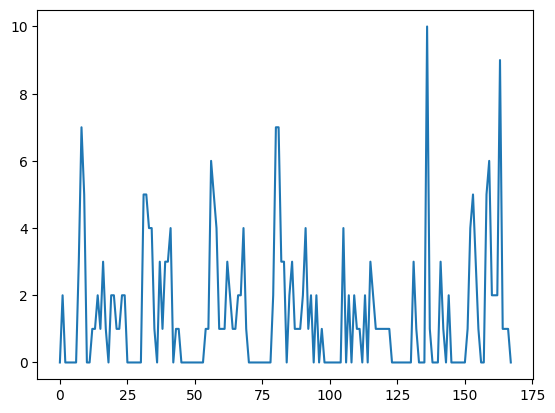

In [117]:
import seaborn as sns
# Visualize traffic over time
sensor_number = 1
hours = 168
sensor_labels = [hour for hour in train_plugs_numpy[0:hours,0,0]]
sns.lineplot(data=sensor_labels)

# NOT USED

### Fixing address.

For some stations, there are 2 values of address, but they are the same. For example, for station 114 the address values are: [Calle Quintana nº 11, Calle Quintana nº 11-13] which are the same.

In [ ]:
counting_address = data_static_graph_index.groupby('number')['address'].agg([('Unique Count', 'nunique'), ('Unique Values', 'unique')]).reset_index()
counting_address[counting_address["Unique Count"]>1].head()

,number,Unique Count,Unique Values
4,103,2,"[Calle José Ortega y Gasset nº 4, Calle Ortega..."
9,107,2,"[Calle Serrano nº 8, Calle Serrano nº 6]"
17,113,2,"[Paseo del Pintor Rosales frente al nº 38, Pas..."
18,114,2,"[Calle Quintana nº 11, Calle Quintana nº 11-13]"
20,116a,2,"[Calle Princesa nº 5, Plaza de España]"


In [ ]:
counting_address["Unique Values"] = counting_address["Unique Values"].apply(lambda row: row[0])

In [ ]:
counting_address = counting_address[["number", "Unique Values"]]
counting_address.columns = ["number", "address"]
counting_address.head()

,number,address
0,10,Calle Marqués de la Ensenada nº 16
1,100,Calle Goya nº 99
2,101,Calle Jorge Juan nº 131
3,102,Calle Alcalá nº 95
4,103,Calle José Ortega y Gasset nº 4


In [ ]:
len(counting_address["number"].unique())

170

In [ ]:
data_static_graph_index["number"].nunique()

170

In [ ]:
data_static_graph_index = data_static_graph_index.drop("address", axis = 1)
data_static_graph_index = pd.merge(data_static_graph_index, counting_address, on = "number", how = "left")
len(data_static_graph_index["address"].unique())

164